#### Import libraries

In [1]:
import pandas as pd
import random
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import set_config
import matplotlib.pyplot as plt

#### Ensure reproducibility
- To be expanded

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# Load data (remove header and first column / sample ids)
gene_data = pd.read_csv('archs_gene_very_small.tsv', sep='\t', header=None, skiprows=1)
gene_data = gene_data.iloc[:, 1:]
gene_data.head()

,1,2,3,4,5,6,7,8,9,10,...,18956,18957,18958,18959,18960,18961,18962,18963,18964,18965
0,2.808001,0.146667,1.522200,1.951247,0.000000,0.761953,0.000000,2.180121,3.665097,0.000000,...,2.573919,1.071359,0.498314,0.000000,0.000000,1.010470,1.089335,7.949528,1.231341,2.523598
1,2.392233,0.036178,7.570420,0.699714,0.152128,2.384229,0.000000,3.093951,2.633251,0.000000,...,1.647097,2.084497,0.074117,0.335072,1.391557,0.141328,1.224800,6.773719,1.199932,2.207346
2,4.288390,0.777380,1.597797,1.297746,0.000000,1.765906,0.072869,7.404695,5.880534,0.000000,...,5.007085,7.096970,1.015069,2.342714,4.492950,1.202727,2.276278,6.418164,4.442671,4.773526
3,2.644249,0.092517,0.094436,0.924249,0.000000,0.045038,0.033435,6.204663,3.079830,0.064328,...,4.087812,6.756117,0.212525,1.424847,3.084751,2.289747,2.489499,6.583049,2.835447,4.189276
4,4.136538,0.000000,6.873902,0.000000,0.000000,1.854200,0.000000,4.083567,5.713674,0.000000,...,2.979250,2.514846,1.253094,1.885699,2.702891,0.089266,2.387202,6.009069,2.705997,3.915401


#### PCA + t-SNE

In [4]:
# PCA
# number of PCA components  must be less than the number of samples
n_PCA_components = min(20, min(gene_data.shape) - 1)
pca_obj = PCA(n_components=n_PCA_components)
pca_result = pca_obj.fit_transform(gene_data)

n_TSNE_components = 2 
n_TSNE_components = 3 

# perplexity must be less than the number of samples
perplexity_value = min(20, gene_data.shape[0] - 1)  
tsne_obj = TSNE(n_components=n_TSNE_components, random_state=SEED, perplexity=perplexity_value)
tsne_result = tsne_obj.fit_transform(pca_result)

#### Plots

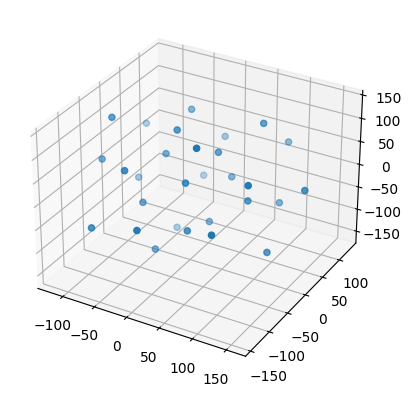

In [5]:
if n_TSNE_components == 2:
    # 2D
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
else: 
    # 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
plt.show()